# Source Data Exploration & Initial Cleaning

**Purpose**:
  Load the individual synthetic data sources generated in Notebook 00.
  Perform Exploratory Data Analysis (EDA) on each source separately to understand
  its structure, data types, distributions, and potential issues.
  Conduct basic data cleaning steps on each source dataset *before* merging,
  addressing issues like missing values, data types, and duplicates.
  (Version incorporates fixes for Pandas FutureWarning regarding inplace fillna).

**Prerequisites**:
  - Python environment set up (from Notebook 00).
  - Synthetic data files exist:
    - 'synthetic_tax_filings.csv'
    - 'synthetic_property_ownership.csv'
    - (Optional) 'synthetic_company_directorships.csv'

**Next Step**:
  Notebook 02 will use the cleaned dataframes produced here to build unified
  entity profiles.

## Imports and Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # To check for optional file existence

# --- Configuration ---
DATA_DIR = './data' # Assuming data is in a 'data' subdirectory
TAX_FILINGS_FILE = os.path.join(DATA_DIR, 'synthetic_tax_filings.csv')
PROPERTY_OWNERSHIP_FILE = os.path.join(DATA_DIR, 'synthetic_property_ownership.csv')
COMPANY_DIRECTORSHIPS_FILE = os.path.join(DATA_DIR, 'synthetic_company_directorships.csv') # Optional

# --- Style Settings for Plots ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 50) # Show more columns in describe/head

print("Notebook 01: Source Data Exploration & Initial Cleaning (Corrected)")
print("-" * 50)
print(f"Expected Tax Filings file: {TAX_FILINGS_FILE}")
print(f"Expected Property Ownership file: {PROPERTY_OWNERSHIP_FILE}")
print(f"Expected (Optional) Company Directorships file: {COMPANY_DIRECTORSHIPS_FILE}")
print("-" * 50)

Notebook 01: Source Data Exploration & Initial Cleaning (Corrected)
--------------------------------------------------
Expected Tax Filings file: ./data/synthetic_tax_filings.csv
Expected Property Ownership file: ./data/synthetic_property_ownership.csv
Expected (Optional) Company Directorships file: ./data/synthetic_company_directorships.csv
--------------------------------------------------


## Load Data Sources

In [2]:
print("\n[1. Loading Data Sources]")

try:
    tax_df = pd.read_csv(TAX_FILINGS_FILE)
    print(f"Successfully loaded Tax Filings data: {tax_df.shape[0]} rows, {tax_df.shape[1]} columns")
except FileNotFoundError:
    print(f"ERROR: Tax Filings file not found at {TAX_FILINGS_FILE}. Please ensure Notebook 00 was run successfully.")
    # Exit or raise error if essential file is missing
    raise

try:
    property_df = pd.read_csv(PROPERTY_OWNERSHIP_FILE)
    print(f"Successfully loaded Property Ownership data: {property_df.shape[0]} rows, {property_df.shape[1]} columns")
except FileNotFoundError:
    print(f"ERROR: Property Ownership file not found at {PROPERTY_OWNERSHIP_FILE}. Please ensure Notebook 00 was run successfully.")
    # Exit or raise error if essential file is missing
    raise

# Optional: Load Company Directorships data if it exists
company_df = None
if os.path.exists(COMPANY_DIRECTORSHIPS_FILE):
    try:
        company_df = pd.read_csv(COMPANY_DIRECTORSHIPS_FILE)
        print(f"Successfully loaded Company Directorships data: {company_df.shape[0]} rows, {company_df.shape[1]} columns")
    except Exception as e:
        print(f"Warning: Could not load Company Directorships file at {COMPANY_DIRECTORSHIPS_FILE}. Error: {e}")
else:
    print("Info: Optional Company Directorships file not found. Skipping.")


[1. Loading Data Sources]
Successfully loaded Tax Filings data: 4750 rows, 4 columns
Successfully loaded Property Ownership data: 4599 rows, 4 columns
Successfully loaded Company Directorships data: 825 rows, 3 columns


## Explore & Clean: Synthetic Tax Filings


[2. Exploring & Cleaning: Synthetic Tax Filings]

--- 2.1 Initial Exploration (Tax Filings) ---
First 5 rows:
      Taxpayer ID  Declared Income  Deductions         Sector
0  TXP_D071557798        250000.00    48301.93     Technology
1  TXP_738274570C        147896.72    23505.16  Manufacturing
2  TXP_69ADD4CD8E         51184.27     9297.54     Healthcare
3  TXP_FA5B2DA725         42463.53     9691.49         Retail
4  TXP_D54BC83B72         36677.42     2491.77     Technology

Data Info (Types, Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Taxpayer ID      4750 non-null   object 
 1   Declared Income  4614 non-null   float64
 2   Deductions       4599 non-null   float64
 3   Sector           4607 non-null   object 
dtypes: float64(2), object(2)
memory usage: 148.6+ KB

Summary Statistics (Numerical):
           Taxpay

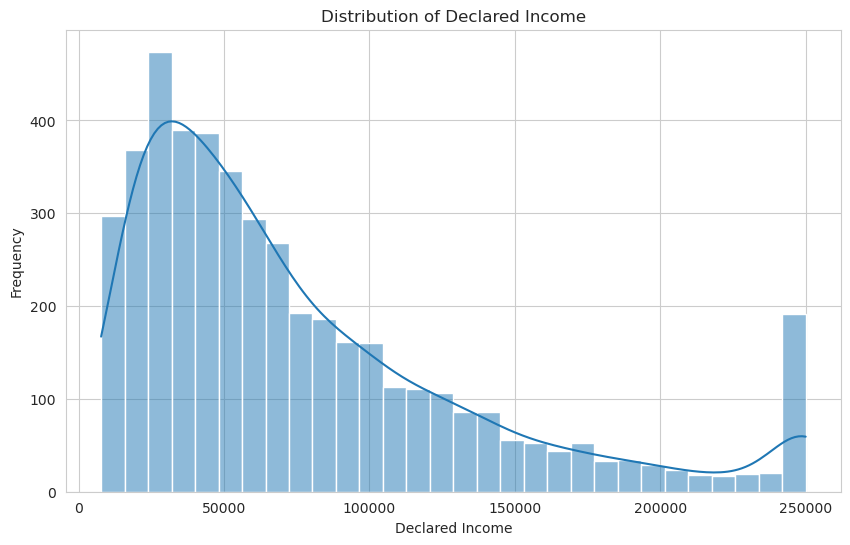

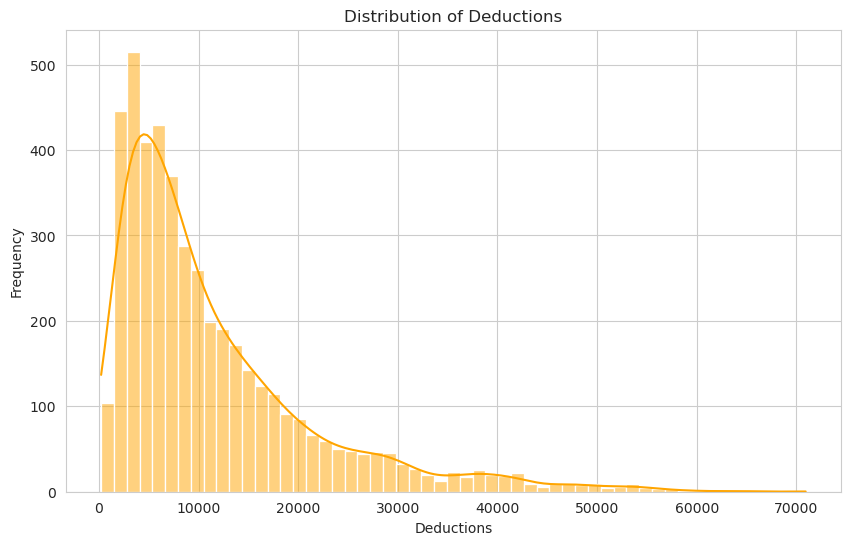

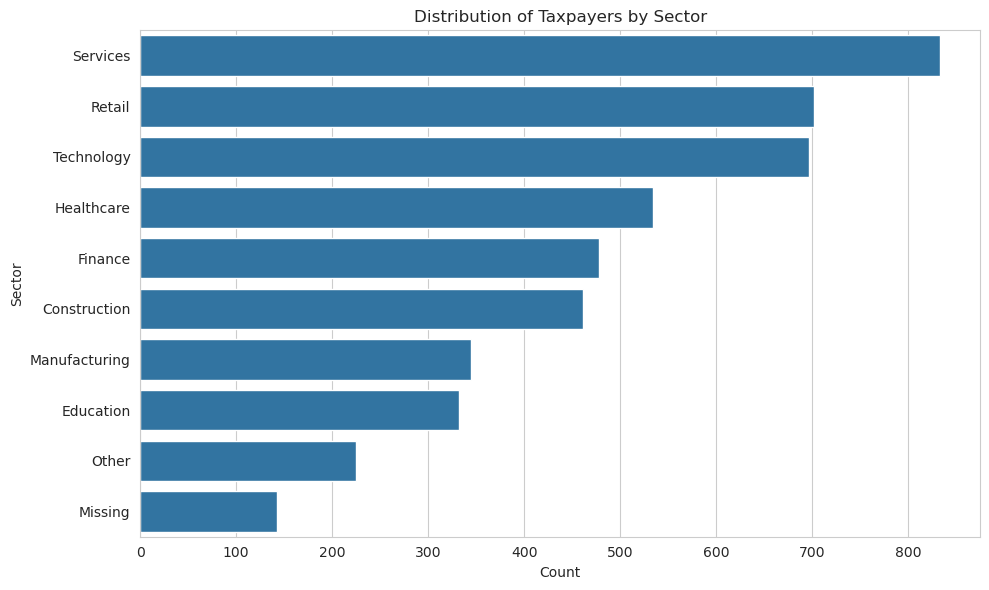


No duplicate Taxpayer IDs found in Tax Filings source.

--- 2.3 Cleaning Steps (Tax Filings) ---
Filled missing values in 'Declared Income' with median (57096.39).
Filled missing values in 'Deductions' with median (8050.14).
Filled missing values in 'Sector' with 'Unknown'.

Final check for missing values after cleaning (Tax Filings):
Taxpayer ID        0
Declared Income    0
Deductions         0
Sector             0
dtype: int64

Data Info after cleaning (Tax Filings):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Taxpayer ID      4750 non-null   object 
 1   Declared Income  4750 non-null   float64
 2   Deductions       4750 non-null   float64
 3   Sector           4750 non-null   object 
dtypes: float64(2), object(2)
memory usage: 148.6+ KB

Cleaned Tax Filings data shape: (4750, 4)


In [3]:
print("\n[2. Exploring & Cleaning: Synthetic Tax Filings]")

if 'tax_df' in locals():
    print("\n--- 2.1 Initial Exploration (Tax Filings) ---")
    print("First 5 rows:")
    print(tax_df.head())
    print("\nData Info (Types, Non-Nulls):")
    tax_df.info()
    print("\nSummary Statistics (Numerical):")
    # Include object columns to see unique counts etc.
    print(tax_df.describe(include='all'))
    print("\nMissing Value Counts:")
    print(tax_df.isnull().sum())

    # --- Visual EDA (Tax Filings) ---
    print("\n--- 2.2 Visual EDA (Tax Filings) ---")

    # Distribution of Declared Income
    plt.figure()
    sns.histplot(tax_df['Declared Income'].dropna(), kde=True) # Drop NA for plotting
    plt.title('Distribution of Declared Income')
    plt.xlabel('Declared Income')
    plt.ylabel('Frequency')
    plt.show()

    # Distribution of Deductions
    plt.figure()
    sns.histplot(tax_df['Deductions'].dropna(), kde=True, color='orange') # Drop NA for plotting
    plt.title('Distribution of Deductions')
    plt.xlabel('Deductions')
    plt.ylabel('Frequency')
    plt.show()

    # Sector Distribution
    plt.figure()
    sns.countplot(y=tax_df['Sector'].fillna('Missing'), order=tax_df['Sector'].fillna('Missing').value_counts().index) # Fill NA for counting plot
    plt.title('Distribution of Taxpayers by Sector')
    plt.xlabel('Count')
    plt.ylabel('Sector')
    plt.tight_layout()
    plt.show()

    # Check for duplicate Taxpayer IDs in this source
    duplicate_tax_ids = tax_df[tax_df.duplicated(subset=['Taxpayer ID'], keep=False)]
    if not duplicate_tax_ids.empty:
        print(f"\nWarning: Found {duplicate_tax_ids.shape[0]} rows with duplicate Taxpayer IDs in Tax Filings.")
        # Decision needed: Keep first? Keep last? Aggregate? Depends on data generation logic.
        # For this example, we'll assume the latest filing is most relevant if duplicates exist (arbitrary choice for demo)
    else:
        print("\nNo duplicate Taxpayer IDs found in Tax Filings source.")

    # --- Cleaning (Tax Filings) ---
    print("\n--- 2.3 Cleaning Steps (Tax Filings) ---")
    tax_df_cleaned = tax_df.copy()

    # Example Cleaning Step 1: Handle Missing Values
    # Strategy: For simplicity, fill numerical missing values with the median.
    # A more complex strategy might involve imputation based on sector, but median is robust to outliers.
    # For categorical (Sector), fill with 'Unknown' or the mode. Let's use 'Unknown'.
    numerical_cols_tax = ['Declared Income', 'Deductions']
    categorical_cols_tax = ['Sector']

    for col in numerical_cols_tax:
        if tax_df_cleaned[col].isnull().any():
            median_val = tax_df_cleaned[col].median()
            # CORRECTED: Assign result back to column instead of using inplace=True
            tax_df_cleaned[col] = tax_df_cleaned[col].fillna(median_val)
            print(f"Filled missing values in '{col}' with median ({median_val:.2f}).")

    for col in categorical_cols_tax:
        if tax_df_cleaned[col].isnull().any():
            fill_value = 'Unknown'
             # CORRECTED: Assign result back to column instead of using inplace=True
            tax_df_cleaned[col] = tax_df_cleaned[col].fillna(fill_value)
            print(f"Filled missing values in '{col}' with '{fill_value}'.")

    # Example Cleaning Step 2: Ensure Correct Data Types
    # Taxpayer ID should ideally be treated as a string/object identifier
    if not pd.api.types.is_string_dtype(tax_df_cleaned['Taxpayer ID']):
        tax_df_cleaned['Taxpayer ID'] = tax_df_cleaned['Taxpayer ID'].astype(str)
        print("Converted 'Taxpayer ID' to string type.")

    # Example Cleaning Step 3: Handle Duplicates (if found and necessary)
    # Based on the check above. If duplicates need removal:
    if not duplicate_tax_ids.empty:
        initial_rows = tax_df_cleaned.shape[0]
        # Example: Keep the last entry for each Taxpayer ID
        tax_df_cleaned = tax_df_cleaned.drop_duplicates(subset=['Taxpayer ID'], keep='last')
        print(f"Handled duplicate Taxpayer IDs by keeping the last entry. Removed {initial_rows - tax_df_cleaned.shape[0]} rows.")

    print("\nFinal check for missing values after cleaning (Tax Filings):")
    print(tax_df_cleaned.isnull().sum())
    print("\nData Info after cleaning (Tax Filings):")
    tax_df_cleaned.info()
    print("\nCleaned Tax Filings data shape:", tax_df_cleaned.shape)


## Explore & Clean: Synthetic Property Ownership


[3. Exploring & Cleaning: Synthetic Property Ownership]

--- 3.1 Initial Exploration (Property Ownership) ---
First 5 rows:
      Taxpayer ID  Property Value       Location Ownership Date
0  TXP_E0825D3E91       638048.78     Rural East     2010-12-18
1  TXP_6D6BEB4D86       763041.06    City Center     2022-10-22
2  TXP_F9C36A2195       172513.43    City Center     2024-09-29
3  TXP_AE0B08750C        50000.00   Coastal Area     2008-09-03
4  TXP_5A62A4A5DF        84684.26  Suburban West     2019-02-19

Data Info (Types, Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Taxpayer ID     4599 non-null   object 
 1   Property Value  4413 non-null   float64
 2   Location        4423 non-null   object 
 3   Ownership Date  4419 non-null   object 
dtypes: float64(1), object(3)
memory usage: 143.8+ KB

Summary Statistics (Numerical

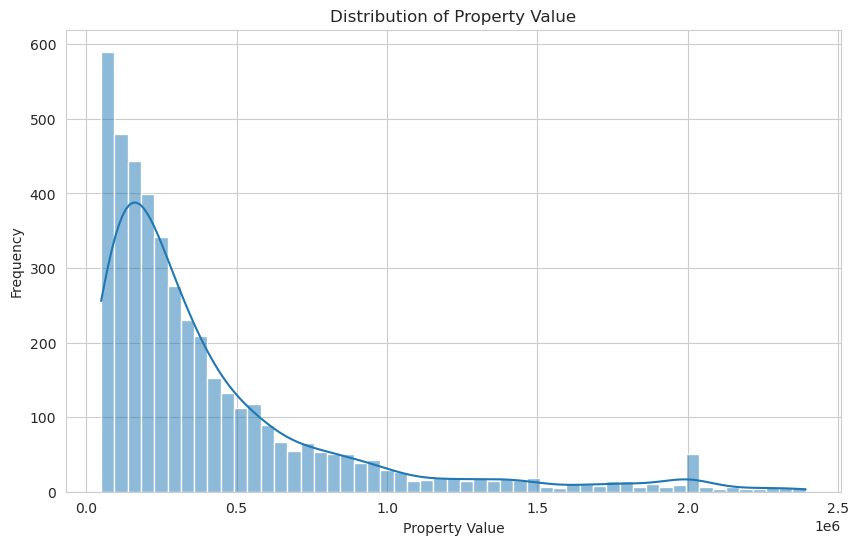

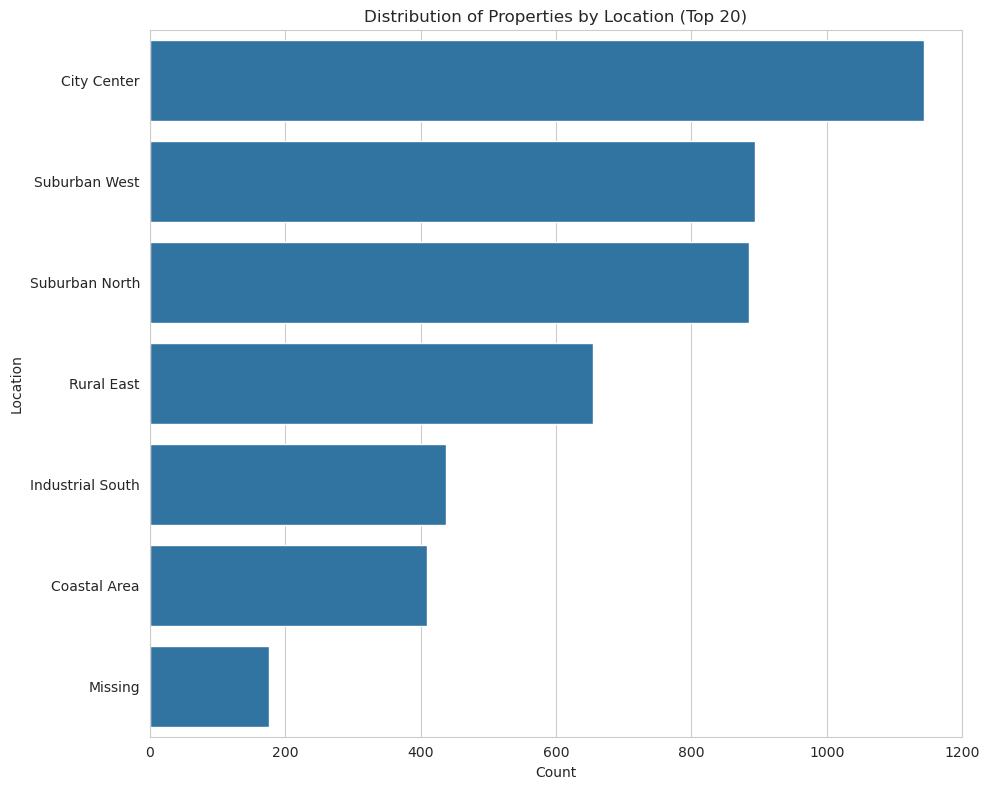


Properties per Taxpayer ID statistics:
count    2578.000000
mean        1.783941
std         0.954262
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: count, dtype: float64


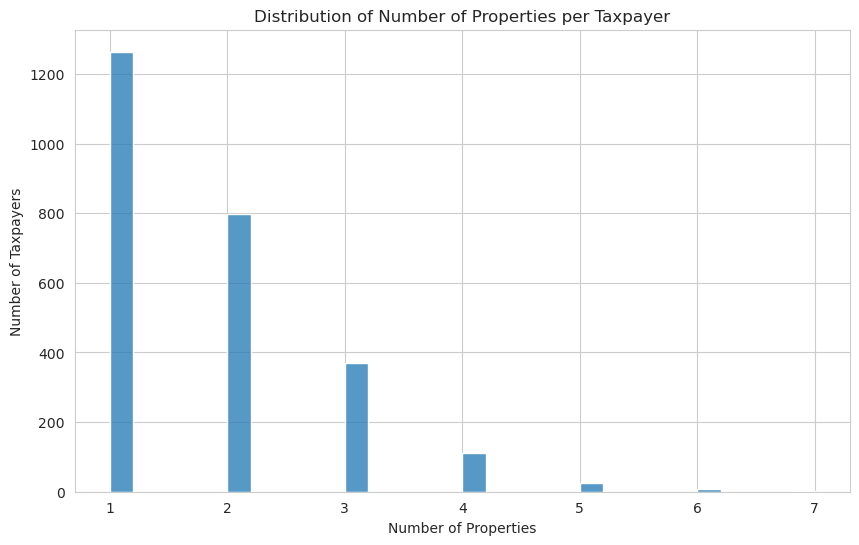


No obvious duplicate property records found.

--- 3.3 Cleaning Steps (Property Ownership) ---
Filled missing values in 'Property Value' with median (263237.77).
Filled missing values in 'Location' with 'Unknown'.
Converted 'Ownership Date' to datetime and filled missing/invalid dates with 1900-01-01.

Final check for missing values after cleaning (Property Ownership):
Taxpayer ID       0
Property Value    0
Location          0
Ownership Date    0
dtype: int64

Data Info after cleaning (Property Ownership):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Taxpayer ID     4599 non-null   object        
 1   Property Value  4599 non-null   float64       
 2   Location        4599 non-null   object        
 3   Ownership Date  4599 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 143.8+

In [4]:
print("\n[3. Exploring & Cleaning: Synthetic Property Ownership]")

if 'property_df' in locals():
    print("\n--- 3.1 Initial Exploration (Property Ownership) ---")
    print("First 5 rows:")
    print(property_df.head())
    print("\nData Info (Types, Non-Nulls):")
    property_df.info()
    print("\nSummary Statistics (Numerical):")
    print(property_df.describe(include='all'))
    print("\nMissing Value Counts:")
    print(property_df.isnull().sum())

    # --- Visual EDA (Property Ownership) ---
    print("\n--- 3.2 Visual EDA (Property Ownership) ---")

    # Distribution of Property Value
    plt.figure()
    sns.histplot(property_df['Property Value'].dropna(), kde=True) # Drop NA for plotting
    plt.title('Distribution of Property Value')
    plt.xlabel('Property Value')
    plt.ylabel('Frequency')
    plt.show()

    # Location Distribution (Top N locations if many)
    top_n = 20
    location_counts = property_df['Location'].fillna('Missing').value_counts() # Fill NA for counting plot
    plt.figure(figsize=(10, 8)) # Adjust size if needed
    sns.countplot(y=property_df['Location'].fillna('Missing'), order=location_counts.index[:top_n])
    plt.title(f'Distribution of Properties by Location (Top {top_n})')
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()

    # Check how many properties per Taxpayer ID
    properties_per_taxpayer = property_df['Taxpayer ID'].value_counts()
    print("\nProperties per Taxpayer ID statistics:")
    print(properties_per_taxpayer.describe())
    plt.figure()
    sns.histplot(properties_per_taxpayer, bins=30)
    plt.title('Distribution of Number of Properties per Taxpayer')
    plt.xlabel('Number of Properties')
    plt.ylabel('Number of Taxpayers')
    plt.show()

    # Check for duplicate entries (e.g., same taxpayer, same property details?)
    # Assuming 'Property ID' exists or a combination of fields defines uniqueness per property
    # If no Property ID, check duplicates based on Taxpayer ID and other property details
    key_cols_prop = ['Taxpayer ID', 'Property Value', 'Location', 'Ownership Date'] # Adjust if a unique Property ID exists
    duplicate_properties = property_df[property_df.duplicated(subset=key_cols_prop, keep=False)]
    if not duplicate_properties.empty:
        print(f"\nWarning: Found {duplicate_properties.shape[0]} potentially duplicate property records based on {key_cols_prop}.")
        # print(duplicate_properties.sort_values(by='Taxpayer ID').head()) # Optional: show duplicates
    else:
        print("\nNo obvious duplicate property records found.")

    # --- Cleaning (Property Ownership) ---
    print("\n--- 3.3 Cleaning Steps (Property Ownership) ---")
    property_df_cleaned = property_df.copy()

    # Example Cleaning Step 1: Handle Missing Values
    # Strategy: Fill missing Property Value with median. Fill Location with 'Unknown'.
    # Convert Ownership Date to datetime and handle missing dates (e.g., fill with a specific date or drop).
    numerical_cols_prop = ['Property Value']
    categorical_cols_prop = ['Location']
    date_cols_prop = ['Ownership Date']

    for col in numerical_cols_prop:
        if property_df_cleaned[col].isnull().any():
            median_val = property_df_cleaned[col].median()
            # CORRECTED: Assign result back to column
            property_df_cleaned[col] = property_df_cleaned[col].fillna(median_val)
            print(f"Filled missing values in '{col}' with median ({median_val:.2f}).")

    for col in categorical_cols_prop:
        if property_df_cleaned[col].isnull().any():
            fill_value = 'Unknown'
            # CORRECTED: Assign result back to column
            property_df_cleaned[col] = property_df_cleaned[col].fillna(fill_value)
            print(f"Filled missing values in '{col}' with '{fill_value}'.")

    # Example Cleaning Step 2: Ensure Correct Data Types
    if not pd.api.types.is_string_dtype(property_df_cleaned['Taxpayer ID']):
        property_df_cleaned['Taxpayer ID'] = property_df_cleaned['Taxpayer ID'].astype(str)
        print("Converted 'Taxpayer ID' to string type.")

    for col in date_cols_prop:
        # Convert column to datetime, coercing errors (invalid formats become NaT)
        property_df_cleaned[col] = pd.to_datetime(property_df_cleaned[col], errors='coerce')
        if property_df_cleaned[col].isnull().any():
             # Decide how to handle missing/invalid dates. Fill with a placeholder?
             placeholder_date = pd.to_datetime('1900-01-01')
             # CORRECTED: Assign result back to column
             property_df_cleaned[col] = property_df_cleaned[col].fillna(placeholder_date)
             print(f"Converted '{col}' to datetime and filled missing/invalid dates with {placeholder_date.date()}.")
        else:
             print(f"Converted '{col}' to datetime type successfully.")


    # Example Cleaning Step 3: Handle Duplicates (if necessary)
    if not duplicate_properties.empty:
        initial_rows = property_df_cleaned.shape[0]
        # Example: Drop exact duplicates based on key columns
        property_df_cleaned = property_df_cleaned.drop_duplicates(subset=key_cols_prop, keep='first')
        print(f"Removed {initial_rows - property_df_cleaned.shape[0]} duplicate property records.")

    print("\nFinal check for missing values after cleaning (Property Ownership):")
    print(property_df_cleaned.isnull().sum())
    print("\nData Info after cleaning (Property Ownership):")
    property_df_cleaned.info()
    print("\nCleaned Property Ownership data shape:", property_df_cleaned.shape)



## Explore & Clean: Synthetic Company Directorships (Optional)


[4. Exploring & Cleaning: Synthetic Company Directorships (Optional)]

--- 4.1 Initial Exploration (Company Directorships) ---
First 5 rows:
      Taxpayer ID     Company ID           Director Role
0  TXP_F3F866135D  COMP_516ACF7D               Secretary
1  TXP_0C68BEDDD7  COMP_00512A5C                Director
2  TXP_83E6E3CEAE  COMP_E952575C                Director
3  TXP_D818851361  COMP_EF0975DB                Director
4  TXP_FC41D1E421  COMP_5BFEEF41  Non-Executive Director

Data Info (Types, Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Taxpayer ID    825 non-null    object
 1   Company ID     825 non-null    object
 2   Director Role  813 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB

Summary Statistics (Categorical):
           Taxpayer ID     Company ID Director Role
count              825            825 

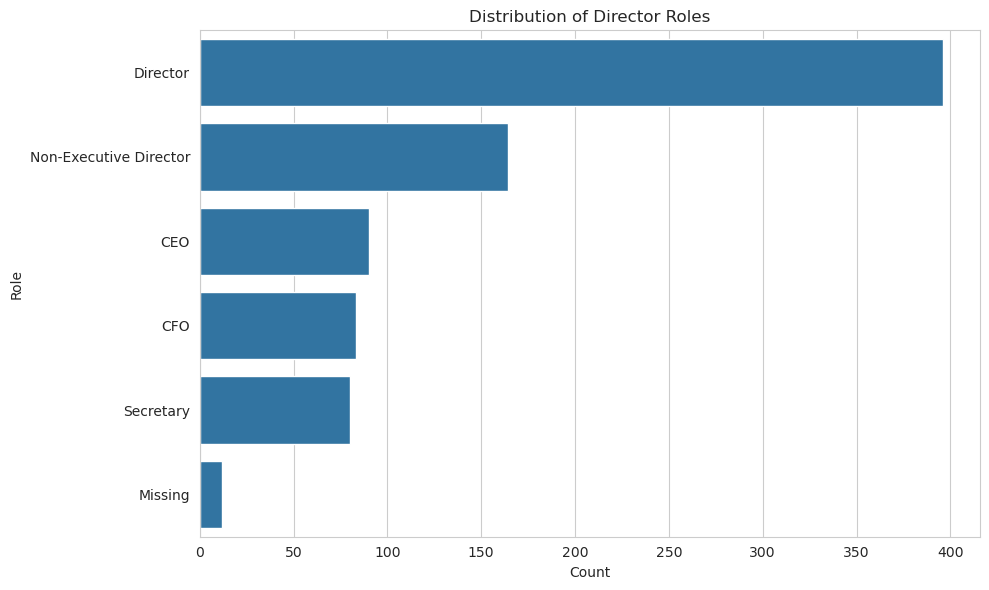


Directorships per Taxpayer ID statistics:
count    488.000000
mean       1.690574
std        0.871964
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: count, dtype: float64


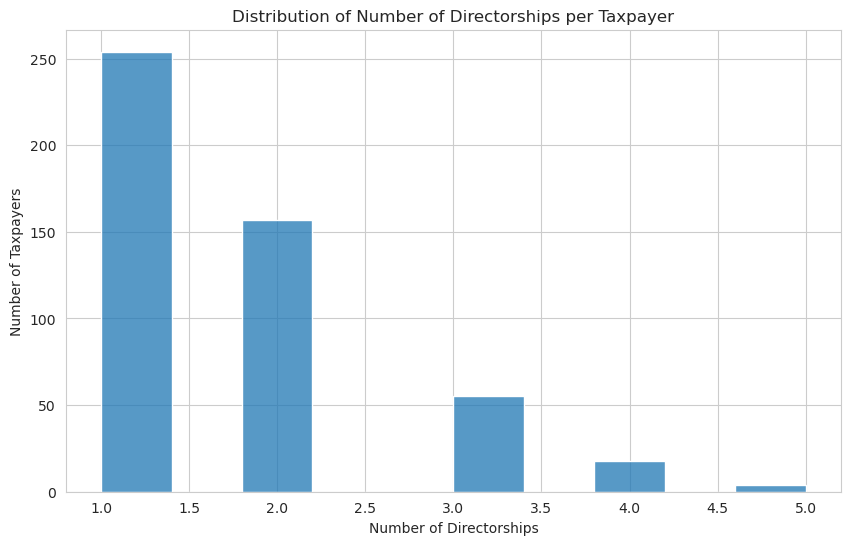


No obvious duplicate directorship records found.

--- 4.3 Cleaning Steps (Company Directorships) ---
Filled missing values in 'Director Role' with 'Unknown'.

Final check for missing values after cleaning (Company Directorships):
Taxpayer ID      0
Company ID       0
Director Role    0
dtype: int64

Data Info after cleaning (Company Directorships):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Taxpayer ID    825 non-null    object
 1   Company ID     825 non-null    object
 2   Director Role  825 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB

Cleaned Company Directorships data shape: (825, 3)


In [5]:
print("\n[4. Exploring & Cleaning: Synthetic Company Directorships (Optional)]")

if company_df is not None:
    print("\n--- 4.1 Initial Exploration (Company Directorships) ---")
    print("First 5 rows:")
    print(company_df.head())
    print("\nData Info (Types, Non-Nulls):")
    company_df.info()
    print("\nSummary Statistics (Categorical):")
    print(company_df.describe(include=['object'])) # Primarily categorical data here
    print("\nMissing Value Counts:")
    print(company_df.isnull().sum())

    # --- Visual EDA (Company Directorships) ---
    print("\n--- 4.2 Visual EDA (Company Directorships) ---")

    # Distribution of Director Roles
    plt.figure()
    sns.countplot(y=company_df['Director Role'].fillna('Missing'), order=company_df['Director Role'].fillna('Missing').value_counts().index) # Fill NA for plotting
    plt.title('Distribution of Director Roles')
    plt.xlabel('Count')
    plt.ylabel('Role')
    plt.tight_layout()
    plt.show()

    # Directorships per Taxpayer ID
    directorships_per_taxpayer = company_df['Taxpayer ID'].value_counts()
    print("\nDirectorships per Taxpayer ID statistics:")
    print(directorships_per_taxpayer.describe())
    plt.figure()
    sns.histplot(directorships_per_taxpayer, bins=max(10, int(directorships_per_taxpayer.max()/2))) # Adjust bins
    plt.title('Distribution of Number of Directorships per Taxpayer')
    plt.xlabel('Number of Directorships')
    plt.ylabel('Number of Taxpayers')
    plt.show()

    # Check for duplicates (e.g., same Taxpayer ID, same Company ID, same Role)
    key_cols_comp = ['Taxpayer ID', 'Company ID', 'Director Role']
    duplicate_directorships = company_df[company_df.duplicated(subset=key_cols_comp, keep=False)]
    if not duplicate_directorships.empty:
        print(f"\nWarning: Found {duplicate_directorships.shape[0]} potentially duplicate directorship records based on {key_cols_comp}.")
        # print(duplicate_directorships.sort_values(by='Taxpayer ID').head()) # Optional: show duplicates
    else:
        print("\nNo obvious duplicate directorship records found.")

    # --- Cleaning (Company Directorships) ---
    print("\n--- 4.3 Cleaning Steps (Company Directorships) ---")
    company_df_cleaned = company_df.copy()

    # Example Cleaning Step 1: Handle Missing Values
    # Strategy: Fill missing 'Director Role' with 'Unknown'.
    categorical_cols_comp = ['Director Role'] # Add others if applicable

    for col in categorical_cols_comp:
        if company_df_cleaned[col].isnull().any():
            fill_value = 'Unknown'
            # CORRECTED: Assign result back to column (addresses the specific FutureWarning raised by user)
            company_df_cleaned[col] = company_df_cleaned[col].fillna(fill_value)
            print(f"Filled missing values in '{col}' with '{fill_value}'.")

    # Example Cleaning Step 2: Ensure Correct Data Types
    if not pd.api.types.is_string_dtype(company_df_cleaned['Taxpayer ID']):
        company_df_cleaned['Taxpayer ID'] = company_df_cleaned['Taxpayer ID'].astype(str)
        print("Converted 'Taxpayer ID' to string type.")
    if 'Company ID' in company_df_cleaned.columns and not pd.api.types.is_string_dtype(company_df_cleaned['Company ID']):
         company_df_cleaned['Company ID'] = company_df_cleaned['Company ID'].astype(str)
         print("Converted 'Company ID' to string type.")

    # Example Cleaning Step 3: Handle Duplicates (if necessary)
    if not duplicate_directorships.empty:
        initial_rows = company_df_cleaned.shape[0]
        company_df_cleaned = company_df_cleaned.drop_duplicates(subset=key_cols_comp, keep='first')
        print(f"Removed {initial_rows - company_df_cleaned.shape[0]} duplicate directorship records.")

    print("\nFinal check for missing values after cleaning (Company Directorships):")
    print(company_df_cleaned.isnull().sum())
    print("\nData Info after cleaning (Company Directorships):")
    company_df_cleaned.info()
    print("\nCleaned Company Directorships data shape:", company_df_cleaned.shape)

else:
    print("Skipping Company Directorships exploration and cleaning as the file was not loaded.")
    company_df_cleaned = None # Ensure variable exists even if skipped


## Summary & Next Steps

In [6]:
print("\n[5. Summary & Next Steps]")
print("Individual data source exploration and initial cleaning complete.")
print("Summary of cleaned dataframes:")
if 'tax_df_cleaned' in locals():
    print(f"  - Tax Filings: {tax_df_cleaned.shape[0]} rows, {tax_df_cleaned.shape[1]} columns")
if 'property_df_cleaned' in locals():
    print(f"  - Property Ownership: {property_df_cleaned.shape[0]} rows, {property_df_cleaned.shape[1]} columns")
if company_df_cleaned is not None:
    print(f"  - Company Directorships: {company_df_cleaned.shape[0]} rows, {company_df_cleaned.shape[1]} columns")
else:
    print("  - Company Directorships: Not processed.")

print("\nKey actions performed:")
print("  - Loaded data from CSV files.")
print("  - Performed basic EDA (info, describe, null checks, visualizations).")
print("  - Handled missing values using recommended assignment method (avoiding inplace on slices).")
print("  - Ensured consistent data types (especially for IDs and dates).")
print("  - Checked for and potentially handled duplicate records within each source.")

print("\nThe cleaned dataframes (`tax_df_cleaned`, `property_df_cleaned`, `company_df_cleaned`) are now ready for the next step.")
print("Proceed to Notebook 02: Building Unified Entity Profiles.")



[5. Summary & Next Steps]
Individual data source exploration and initial cleaning complete.
Summary of cleaned dataframes:
  - Tax Filings: 4750 rows, 4 columns
  - Property Ownership: 4599 rows, 4 columns
  - Company Directorships: 825 rows, 3 columns

Key actions performed:
  - Loaded data from CSV files.
  - Performed basic EDA (info, describe, null checks, visualizations).
  - Handled missing values using recommended assignment method (avoiding inplace on slices).
  - Ensured consistent data types (especially for IDs and dates).
  - Checked for and potentially handled duplicate records within each source.

The cleaned dataframes (`tax_df_cleaned`, `property_df_cleaned`, `company_df_cleaned`) are now ready for the next step.
Proceed to Notebook 02: Building Unified Entity Profiles.


In [7]:
# Optional: Save the cleaned dataframes to avoid re-running this notebook
SAVE_CLEANED = True
if SAVE_CLEANED:
    try:
        CLEANED_DATA_DIR = os.path.join(DATA_DIR, 'cleaned')
        os.makedirs(CLEANED_DATA_DIR, exist_ok=True)
        if 'tax_df_cleaned' in locals():
            tax_df_cleaned.to_csv(os.path.join(CLEANED_DATA_DIR, 'cleaned_tax_filings.csv'), index=False)
            print(f"Saved cleaned tax data to {CLEANED_DATA_DIR}")
        if 'property_df_cleaned' in locals():
            property_df_cleaned.to_csv(os.path.join(CLEANED_DATA_DIR, 'cleaned_property_ownership.csv'), index=False)
            print(f"Saved cleaned property data to {CLEANED_DATA_DIR}")
        if company_df_cleaned is not None:
            company_df_cleaned.to_csv(os.path.join(CLEANED_DATA_DIR, 'cleaned_company_directorships.csv'), index=False)
            print(f"Saved cleaned company data to {CLEANED_DATA_DIR}")
    except Exception as e:
        print(f"Error saving cleaned data: {e}")

Saved cleaned tax data to ./data/cleaned
Saved cleaned property data to ./data/cleaned
Saved cleaned company data to ./data/cleaned
